# Homework-1_Problem-3b (Normalization)

### Objective: Repeat problem 2 b (Normalization), this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

### Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. 

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading from table
housing = pd.read_csv("/content/gdrive/MyDrive/Datasets/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
m = len(housing)
m

545

In [ ]:
housing.shape

(545, 13)

In [ ]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# split 80% as training set and 20% as testing set
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [ ]:
df_Newtrain.shape

(436, 12)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()   # input Normalization
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,0.596970
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.527273
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.404242
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.363636
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.109091
344,0.140212,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.181818
1,0.495962,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.909091
257,0.446533,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.236364
184,0.081036,0.4,0.333333,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.290909
275,0.152882,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.222424


In [ ]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.248485
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.531987
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.329966
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.262626
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.246465
231,0.191398,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.276094
25,0.350538,0.666667,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.646465
169,0.350538,0.666667,0.5,0.333333,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.329966
494,0.369176,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.087542
120,0.350538,0.333333,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.397306


In [ ]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [ ]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [ ]:
y_Newtrain.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [ ]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091 0.18181818
 0.90909091 0.23636364 0.29090909 0.22242424]


In [ ]:
# preparing the training set

X1 = df_Newtrain.values[:, 0]      # getting input value from first column and putting in Variable-1 (X1)          
X2 = df_Newtrain.values[:, 1]      # getting input value from first column and putting in Variable-2 (X2)          
X3 = df_Newtrain.values[:, 2]      # getting input value from first column and putting in Variable-3 (X3)          
X4 = df_Newtrain.values[:, 3]      # getting input value from first column and putting in Variable-4 (X4)          
X5 = df_Newtrain.values[:, 4]      # getting input value from first column and putting in Variable-5 (X5)         
X6 = df_Newtrain.values[:, 5]      # getting input value from first column and putting in Variable-6 (X6)
X7 = df_Newtrain.values[:, 6]      # getting input value from first column and putting in Variable-7 (X7)
X8 = df_Newtrain.values[:, 7]      # getting input value from first column and putting in Variable-8 (X8)
X9 = df_Newtrain.values[:, 8]      # getting input value from first column and putting in Variable-9 (X9)
X10 = df_Newtrain.values[:, 9]     # getting input value from first column and putting in Variable-10 (X10) 
X11 = df_Newtrain.values[:, 10]    # getting input value from first column and putting in Variable-11 (X11)  

# print first 10 values from each variable
print('X1 = ', X1[: 10]) 
print('X2 = ', X2[: 10])
print('X3 = ', X3[: 10])
print('X4 = ', X4[: 10])
print('X5 = ', X5[: 10])
print('X6 = ', X6[: 10]) 
print('X7 = ', X7[: 10])
print('X8 = ', X8[: 10])
print('X9 = ', X9[: 10])
print('X10 = ', X10[: 10])
print('X11 = ', X11[: 10])

X1 =  [0.4326093  0.31495405 0.34210526 0.31913116 0.12489557 0.14021164
 0.49596213 0.446533   0.08103592 0.15288221]
X2 =  [0.4 0.4 0.2 0.4 0.6 0.2 0.6 0.4 0.4 0.2]
X3 =  [0.         0.33333333 0.         0.         0.         0.
 1.         0.         0.33333333 0.        ]
X4 =  [0.         1.         0.         0.         0.33333333 0.
 1.         0.         0.33333333 0.        ]
X5 =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X6 =  [1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
X7 =  [1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
X8 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X9 =  [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
X10 =  [0.33333333 0.         0.66666667 0.         1.         0.
 1.         0.         0.         0.        ]
X11 =  [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))       # Creating a single column matrix (X_0) of training set size, contains all ones 
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Converting 1D arrays of training X's to 2D arrays

X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)

# print first 5 values from each 2D array
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])
print('X_4 = ', X_4[: 5])
print('X_5 = ', X_5[: 5])
print('X_6 = ', X_6[: 5])
print('X_7 = ', X_7[: 5])
print('X_8 = ', X_8[: 5])
print('X_9 = ', X_9[: 5])
print('X_10 = ', X_10[: 5])
print('X_11 = ', X_11[: 5])

X_1 =  [[0.4326093 ]
 [0.31495405]
 [0.34210526]
 [0.31913116]
 [0.12489557]]
X_2 =  [[0.4]
 [0.4]
 [0.2]
 [0.4]
 [0.6]]
X_3 =  [[0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]]
X_4 =  [[0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.33333333]]
X_5 =  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
X_6 =  [[1.]
 [0.]
 [1.]
 [0.]
 [0.]]
X_7 =  [[1.]
 [0.]
 [1.]
 [1.]
 [0.]]
X_8 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_9 =  [[1.]
 [1.]
 [0.]
 [1.]
 [0.]]
X_10 =  [[0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [1.        ]]
X_11 =  [[0.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [ ]:
# Stacking from X_0 to X_11 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X [: 5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [ ]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [ ]:
y_Newtest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [ ]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [0.24848485 0.53198653 0.32996633 0.26262626 0.24646465 0.27609428
 0.64646465 0.32996633 0.08754209 0.3973064 ]


In [ ]:
# preparing the testing/validarion set
X1_test = df_Newtest.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1_test)            
X2_test = df_Newtest.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2_test)            
X3_test = df_Newtest.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3_test)           
X4_test = df_Newtest.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4_test)           
X5_test = df_Newtest.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5_test)
X6_test = df_Newtest.values[:, 5]     # getting input value from first column and putting in Variable-6 (X6_test)           
X7_test = df_Newtest.values[:, 6]     # getting input value from first column and putting in Variable-7 (X7_test)          
X8_test = df_Newtest.values[:, 7]     # getting input value from first column and putting in Variable-8 (X8_test)           
X9_test = df_Newtest.values[:, 8]     # getting input value from first column and putting in Variable-9 (X9_test)           
X10_test = df_Newtest.values[:, 9]    # getting input value from first column and putting in Variable-10 (X10_test)
X11_test = df_Newtest.values[:, 10]   # getting input value from first column and putting in Variable-11 (X11_test)

# print first 10 values from each variable

print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])
print('X4_test = ', X4_test[: 10])
print('X5_test = ', X5_test[: 10])
print('X6_test = ', X6_test[: 10]) 
print('X7_test = ', X7_test[: 10])
print('X8_test = ', X8_test[: 10])
print('X9_test = ', X9_test[: 10])
print('X10_test = ', X10_test[: 10])
print('X11_test = ', X11_test[: 10])

X1_test =  [0.08817204 0.31182796 0.61784946 0.26308244 0.23655914 0.19139785
 0.35053763 0.35053763 0.36917563 0.35053763]
X2_test =  [0.33333333 0.33333333 0.33333333 0.33333333 0.66666667 0.33333333
 0.66666667 0.66666667 0.         0.33333333]
X3_test =  [0.  0.5 0.  0.  0.  0.  0.5 0.5 0.  0. ]
X4_test =  [0.33333333 0.33333333 0.         0.33333333 0.33333333 0.
 0.33333333 0.33333333 0.         0.        ]
X5_test =  [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
X6_test =  [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
X7_test =  [0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
X8_test =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X9_test =  [0. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
X10_test =  [0.         0.33333333 0.33333333 0.         0.         0.
 0.66666667 0.         0.         0.66666667]
X11_test =  [1. 0. 1. 1. 0. 1. 1. 0. 0. 1.]


In [ ]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))     # Creating a single column matrix (X_0_test) of validation set size, contains all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Converting 1D arrays of validation X's to 2D arrays

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

# print first 5 values from each 2D array
print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])
print('X_3_test = ', X_3_test[: 5])
print('X_4_test = ', X_4_test[: 5])
print('X_5_test = ', X_5_test[: 5])
print('X_6_test = ', X_6_test[: 5])
print('X_7_test = ', X_7_test[: 5])
print('X_8_test = ', X_8_test[: 5])
print('X_9_test = ', X_9_test[: 5])
print('X_10_test = ', X_10_test[: 5])
print('X_11_test = ', X_11_test[: 5])

X_1_test =  [[0.08817204]
 [0.31182796]
 [0.61784946]
 [0.26308244]
 [0.23655914]]
X_2_test =  [[0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.66666667]]
X_3_test =  [[0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
X_4_test =  [[0.33333333]
 [0.33333333]
 [0.        ]
 [0.33333333]
 [0.33333333]]
X_5_test =  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
X_6_test =  [[0.]
 [1.]
 [0.]
 [1.]
 [0.]]
X_7_test =  [[0.]
 [0.]
 [0.]
 [1.]
 [0.]]
X_8_test =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_9_test =  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]]
X_10_test =  [[0.        ]
 [0.33333333]
 [0.33333333]
 [0.        ]
 [0.        ]]
X_11_test =  [[1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
# Stacking X_0_test through X_11_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))
X_test [: 5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [ ]:
# defining function for computing the cost for training set
# parameter penalty is introduced in loss function
# theta zero has not been penalized

def compute_cost(X, y, theta, m, Lambda):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    sqrTheta_new = np.delete(sqrTheta, 0)                                  # square of theta zero is excluded
    J = 1 / (2 * m) * (np.sum(sqrErrors) + Lambda * np.sum(sqrTheta_new)) 
    return J

In [ ]:
# defining function for computing the cost for validation set
# parameters are not penalized for validation set

def compute_cost_test(X_test, y_test, theta, m_test):
    predictions = X_test.dot(theta)
    errors = np.subtract(predictions, y_test)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m_test) * np.sum(sqrErrors)
    return J

In [ ]:
# defining function for gradient descent algorithm
# gradient descent algorithm is applied on the training set
# gradient descent is modified for parameter penalty
# for each iteration loss for both training and validation set is calculated

def gradient_descent(X, y, theta, alpha, iterations, Lambda):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = np.array(theta)*(parameter_penalty) - sum_delta;                 # theta is penalized
        cost_history[i] = compute_cost(X, y, theta, m, Lambda)                   # loss for training set
        cost_test[i] = compute_cost_test(X_test, y_test, theta, m_test)          # loss for validation set
    
    return theta, cost_history, cost_test

#### For learning rate 0.03 (learning rate is chosen between 0.1 and 0.01 as question asked)

In [ ]:
# to penalize theta values in gradient descent algorithm
# parameter_penalty has been introduced
# to exclude theta zero from penalizing, the first element of parameter_penalty is set to 1

theta003 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha003 = 0.03
Lambda = 0.1
p = (1 - (alpha003 * Lambda) / m)
parameter_penalty = np.full(shape=11, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [ ]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta003, m, Lambda)
print('The initial cost for given values of theta_0 to theta_11 = ', cost)

The initial cost for given values of theta_0 to theta_11 =  0.04780662856311236


In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta003, cost_history003, cost_test003 = gradient_descent(X, y, theta003, alpha003, iterations, Lambda)
print('Final value of theta=', theta003)
print('cost_history =', cost_history003)
print('cost_test =', cost_test003)

Final value of theta= [0.04004366 0.10114224 0.06209792 0.12115089 0.10634743 0.06305496
 0.04911905 0.02498638 0.05148948 0.09463316 0.08569125 0.05953477]
cost_history = [0.04209303 0.03720411 0.03302038 0.02943969 0.02637467 0.02375062
 0.02150367 0.0195792  0.0179305  0.01651765 0.01530648 0.0142678
 0.01337665 0.01261166 0.01195458 0.0113898  0.01090398 0.01048568
 0.01012516 0.00981407 0.00954527 0.00931265 0.00911099 0.00893584
 0.00878337 0.00865032 0.00853391 0.00843174 0.00834177 0.00826225
 0.0081917  0.00812884 0.00807257 0.00802196 0.00797621 0.00793465
 0.00789667 0.00786179 0.00782957 0.00779966 0.00777173 0.00774552
 0.0077208  0.00769737 0.00767507 0.00765374 0.00763328 0.00761356
 0.00759451 0.00757604 0.00755809 0.00754059 0.00752351 0.0075068
 0.00749042 0.00747434 0.00745854 0.00744298 0.00742766 0.00741256
 0.00739765 0.00738293 0.00736839 0.00735401 0.00733979 0.00732572
 0.00731179 0.007298   0.00728434 0.00727081 0.00725741 0.00724412
 0.00723096 0.00721791 0.0

Text(0.5, 1.0, 'Convergence of Gradient Descent')

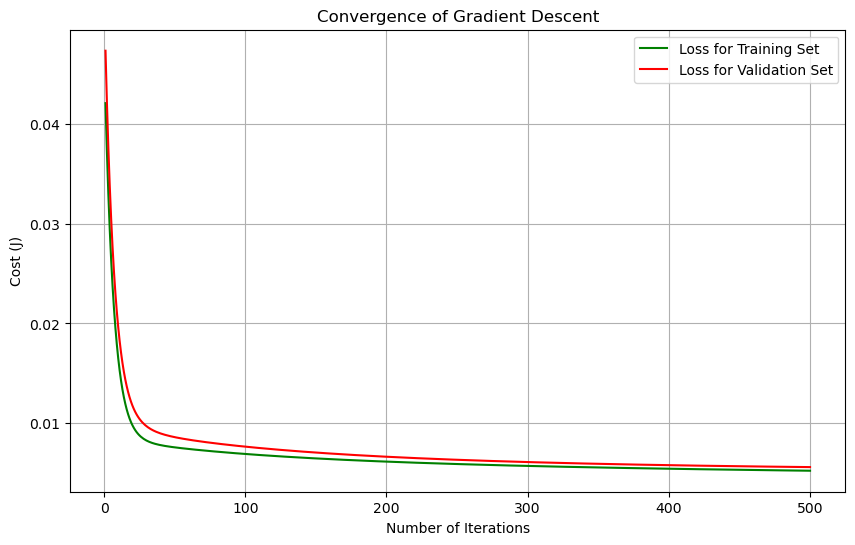

In [ ]:
plt.plot(range(1, iterations + 1),cost_history003, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test003, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

#### For learning rate 0.099 (learning rate is chosen between 0.1 and 0.01 as question asked)

In [ ]:
# to penalize theta values in gradient descent algorithm
# parameter_penalty has been introduced
# to exclude theta zero from penalizing, the first element of parameter_penalty is set to 1

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha = 0.099
Lambda = 0.1
p = (1 - (alpha * Lambda) / m)
parameter_penalty = np.full(shape=11, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [ ]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta, m, Lambda)
print('The initial cost for given values of theta_0 to theta_11 = ', cost)

The initial cost for given values of theta_0 to theta_11 =  0.04780662856311236


In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations, Lambda)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [0.00717294 0.19864981 0.06838441 0.2267223  0.1161261  0.05803463
 0.04272404 0.02590343 0.07786759 0.0820604  0.09003677 0.05777442]
cost_history = [0.03049271 0.02074584 0.01524538 0.01212827 0.01034924 0.00932183
 0.00871696 0.00834999 0.00811729 0.0079607  0.00784755 0.00775949
 0.00768621 0.00762189 0.00756323 0.00750838 0.00745627 0.00740627
 0.00735802 0.00731128 0.00726592 0.00722184 0.00717895 0.00713721
 0.00709657 0.00705698 0.0070184  0.0069808  0.00694414 0.0069084
 0.00687354 0.00683952 0.00680634 0.00677395 0.00674232 0.00671145
 0.00668129 0.00665183 0.00662305 0.00659492 0.00656742 0.00654053
 0.00651424 0.00648853 0.00646336 0.00643874 0.00641465 0.00639105
 0.00636795 0.00634533 0.00632317 0.00630146 0.00628018 0.00625932
 0.00623888 0.00621883 0.00619917 0.00617988 0.00616096 0.00614239
 0.00612417 0.00610628 0.00608872 0.00607147 0.00605453 0.00603789
 0.00602154 0.00600547 0.00598968 0.00597416 0.0059589  0.00594389
 0.00592913 0.00591461 0.

Text(0.5, 1.0, 'Convergence of Gradient Descent')

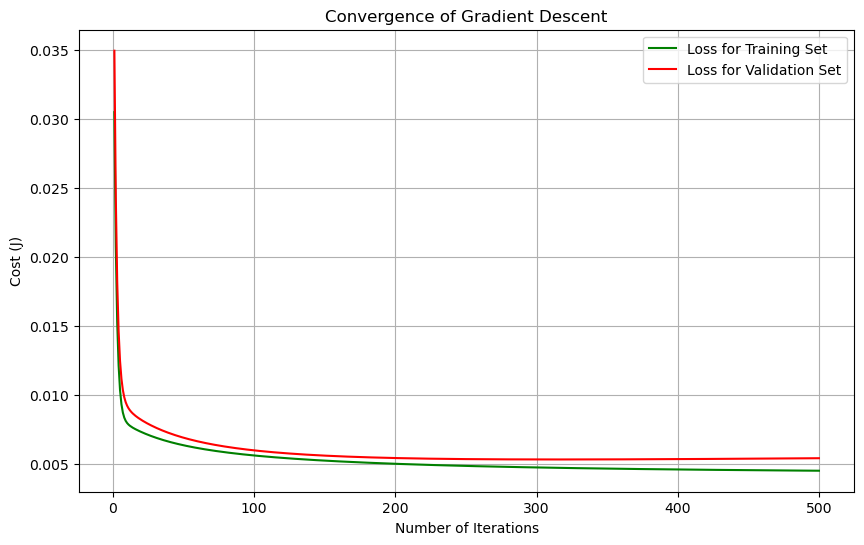

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

#### lamda=0.2 

In [ ]:
# to penalize theta values in gradient descent algorithm
# parameter_penalty has been introduced
# to exclude theta zero from penalizing, the first element of parameter_penalty is set to 1

theta1 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha1 = 0.099
Lambda1 = 0.2
p = (1 - (alpha1 * Lambda1) / m)
parameter_penalty = np.full(shape=11, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [ ]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta1, m, Lambda1)
print('The initial cost for given values of theta_0 to theta_11 = ', cost)

The initial cost for given values of theta_0 to theta_11 =  0.04780662856311236


In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta1, cost_history1, cost_test1 = gradient_descent(X, y, theta1, alpha1, iterations, Lambda1)
print('Final value of theta=', theta1)
print('cost_history =', cost_history1)
print('cost_test =', cost_test1)

Final value of theta= [0.00768609 0.19688408 0.06830091 0.22498666 0.11609495 0.05807407
 0.04285076 0.02590181 0.07756485 0.08218101 0.0901408  0.05780867]
cost_history = [0.03064151 0.02091447 0.0153893  0.01223822 0.01042888 0.00937821
 0.00875687 0.00837881 0.00813894 0.00797786 0.00786202 0.00777243
 0.00769834 0.00763366 0.00757492 0.00752015 0.00746821 0.00741843
 0.00737042 0.00732393 0.00727882 0.00723498 0.00719233 0.00715081
 0.00711038 0.00707099 0.0070326  0.00699518 0.00695869 0.00692311
 0.0068884  0.00685453 0.00682148 0.00678922 0.00675772 0.00672695
 0.00669691 0.00666755 0.00663886 0.00661083 0.00658342 0.00655661
 0.0065304  0.00650476 0.00647967 0.00645511 0.00643108 0.00640755
 0.00638451 0.00636194 0.00633983 0.00631817 0.00629694 0.00627613
 0.00625573 0.00623572 0.0062161  0.00619685 0.00617797 0.00615944
 0.00614125 0.00612339 0.00610586 0.00608864 0.00607173 0.00605512
 0.0060388  0.00602276 0.006007   0.0059915  0.00597626 0.00596128
 0.00594655 0.00593205 0

Text(0.5, 1.0, 'Convergence of Gradient Descent')

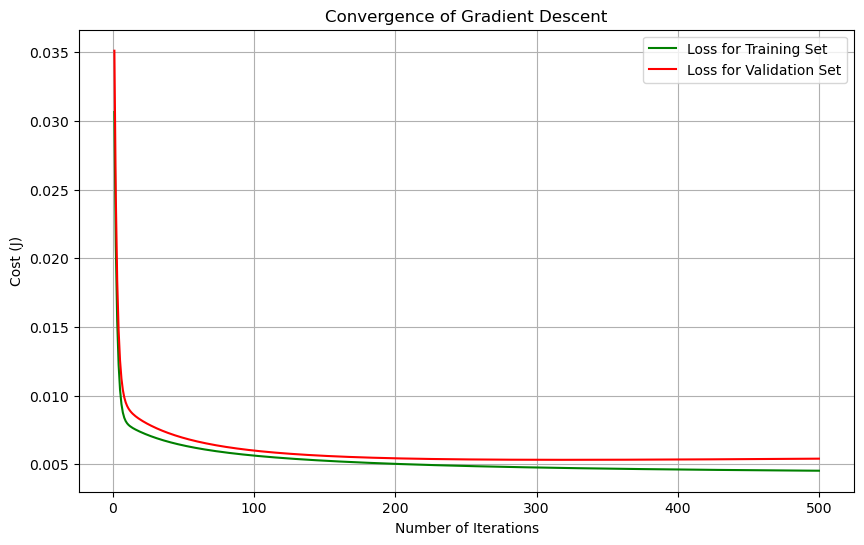

In [ ]:
plt.plot(range(1, iterations + 1),cost_history1, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test1, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

#### lamda=0.001 

In [ ]:
# to penalize theta values in gradient descent algorithm
# parameter_penalty has been introduced
# to exclude theta zero from penalizing, the first element of parameter_penalty is set to 1

theta2 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha2 = 0.099
Lambda2 = 0.001
p = (1 - (alpha2 * Lambda2) / m)
parameter_penalty = np.full(shape=11, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [ ]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta2, m, Lambda2)
print('The initial cost for given values of theta_0 to theta_11 = ', cost)

The initial cost for given values of theta_0 to theta_11 =  0.04780662856311236


In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta2, cost_history2, cost_test2 = gradient_descent(X, y, theta2, alpha2, iterations, Lambda2)
print('Final value of theta=', theta2)
print('cost_history =', cost_history2)
print('cost_test =', cost_test2)

Final value of theta= [0.00701717 0.19848302 0.06854669 0.22670407 0.11634958 0.05801185
 0.04279841 0.02589547 0.07801825 0.08209888 0.09028111 0.05783073]
cost_history = [0.03064122 0.02091325 0.0153871  0.01223519 0.0104252  0.00937404
 0.00875232 0.00837397 0.00813387 0.00797261 0.0078566  0.00776685
 0.00769262 0.0076278  0.00756893 0.00751402 0.00746194 0.00741203
 0.00736389 0.00731727 0.00727203 0.00722805 0.00718527 0.00714362
 0.00710305 0.00706352 0.007025   0.00698745 0.00695083 0.00691512
 0.00688027 0.00684627 0.00681309 0.0067807  0.00674906 0.00671817
 0.006688   0.00665851 0.0066297  0.00660153 0.00657399 0.00654706
 0.00652072 0.00649495 0.00646974 0.00644506 0.0064209  0.00639725
 0.00637408 0.00635139 0.00632916 0.00630738 0.00628603 0.0062651
 0.00624458 0.00622445 0.00620472 0.00618535 0.00616635 0.0061477
 0.0061294  0.00611143 0.00609378 0.00607645 0.00605943 0.0060427
 0.00602627 0.00601012 0.00599425 0.00597864 0.00596329 0.0059482
 0.00593336 0.00591876 0.005

Text(0.5, 1.0, 'Convergence of Gradient Descent')

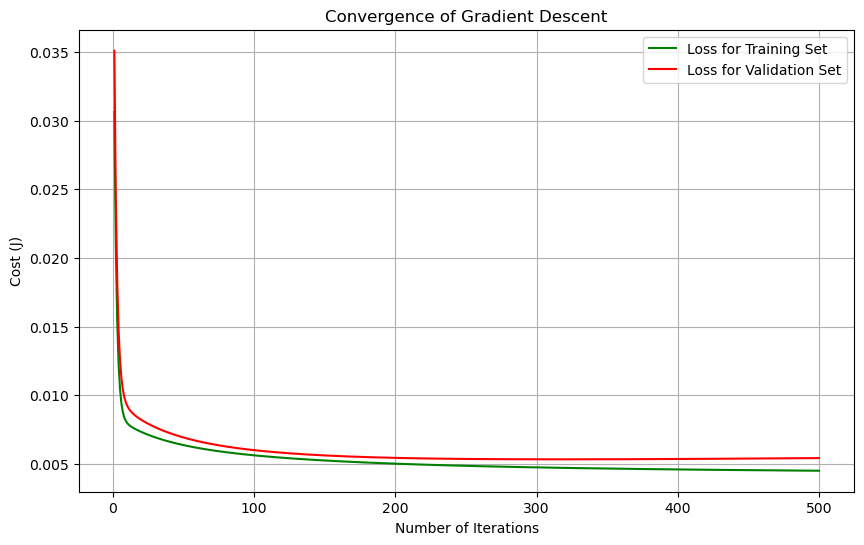

In [ ]:
plt.plot(range(1, iterations + 1),cost_history2, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test2, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

### In problem 3b, we have added a regularization term to the loss function and gradient descent function for the training set. We have experimented with different learning rates, but the resulting cost versus number of iteration plots are nearly identical.

### If we look at the graphs of cost versus iteration for the two scaling techniques (normalization in the current file and standardization in the other file Homework-1_Problem-3b (Standardization)), we can see that normalization gives better accuracy than standardization. This means that the cost is lower for the same iteration in the normalization approach compared to standardization, indicating that normalization performs better in terms of accuracy.

### The cost versus iteration plots, which encompass both training and evaluation losses, exhibit a similar pattern for problems 3b and 2b (with either standardization or normalization). In both problems, it was found that using a learning rate of 0.099 (chosen between 0.1 and 0.01) produced the best performance in terms of the number of iterations required to reach the same level of cost.